In [1]:
import torch
from torch import nn, optim
from torchsummary import summary
import torchvision
import numpy as np
import torchvision.transforms as T
import matplotlib.pyplot as plt
import os
from torch.utils.tensorboard import SummaryWriter
from torch.utils import tensorboard
from torchvision.models import resnet18
import zipfile
import glob
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import random

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
torch.cuda.empty_cache()

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))

Device: cuda:0


In [4]:
print(torch.cuda.device_count())

1


In [5]:
augs = T.Compose([
    T.RandomRotation(degrees = 20),
    T.Resize((224,224)),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])

test_augs=  T.Compose([
    T.Resize((224,224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])

In [6]:
img_files = os.listdir('data/train/train')

def train_path(p):
    return f"data/train/train/{p}"

img_files = list(map(train_path, img_files))
random.shuffle(img_files)

train = img_files[:20000]
val = img_files[20000:]

for i in range(100):
    print(train[i])

class CatDogDataset(Dataset):
    def __init__(self, image_paths, transform):
        super().__init__()
        self.paths = image_paths
        self.len = len(self.paths)
        self.transform = transform

    def __len__(self):
        return self.len

    def __getitem__(self, index):
        path = self.paths[index]
        image = Image.open(path).convert('RGB')
        image = self.transform(image)
        label = 0 if 'cat' in path else 1
        return (image, label)

data/train/train/cat.11546.jpg
data/train/train/cat.7421.jpg
data/train/train/dog.8443.jpg
data/train/train/cat.5304.jpg
data/train/train/dog.6200.jpg
data/train/train/dog.549.jpg
data/train/train/dog.653.jpg
data/train/train/dog.3086.jpg
data/train/train/cat.1929.jpg
data/train/train/dog.4701.jpg
data/train/train/dog.4656.jpg
data/train/train/dog.4862.jpg
data/train/train/cat.8018.jpg
data/train/train/cat.9270.jpg
data/train/train/dog.3842.jpg
data/train/train/cat.5884.jpg
data/train/train/dog.3480.jpg
data/train/train/cat.2840.jpg
data/train/train/cat.1134.jpg
data/train/train/cat.2455.jpg
data/train/train/dog.7904.jpg
data/train/train/dog.9886.jpg
data/train/train/cat.573.jpg
data/train/train/cat.6749.jpg
data/train/train/dog.856.jpg
data/train/train/cat.9188.jpg
data/train/train/dog.166.jpg
data/train/train/cat.5432.jpg
data/train/train/dog.5123.jpg
data/train/train/cat.4724.jpg
data/train/train/dog.5609.jpg
data/train/train/cat.9751.jpg
data/train/train/cat.2229.jpg
data/train/tra

In [7]:
train_data = CatDogDataset(train, augs)
val_data = CatDogDataset(val, test_augs)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle = True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(1)
tensor(0)
tensor(0)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0)
tensor(0)
tensor(1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0)
tensor(0)
tensor(0)
tensor(1)


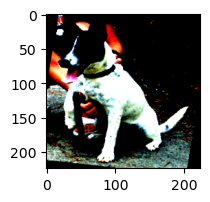

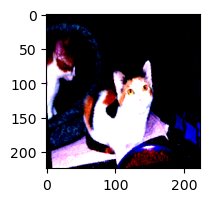

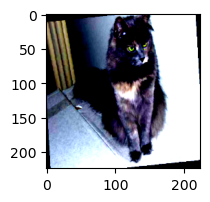

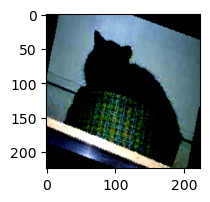

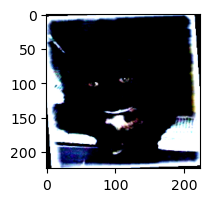

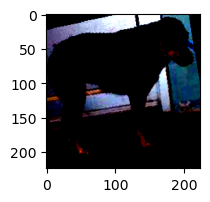

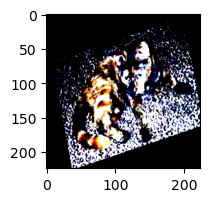

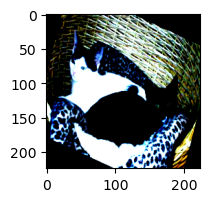

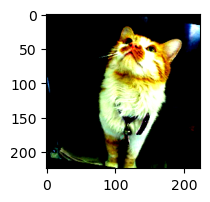

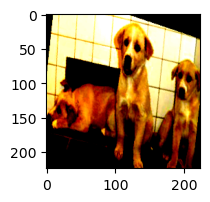

In [8]:
def imshow(img):
    plt.figure(figsize=(2,2))
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))

dataiter = iter(train_loader)
images, labels = next(dataiter)

for i in range(10):
    print(labels[i])
    imshow(torchvision.utils.make_grid(images[i]))

In [9]:
def EfficientNet(num_classes=2):
    model = torchvision.models.efficientnet_b2(weights = 'IMAGENET1K_V1')
    model.fc = nn.Sequential(
        nn.LazyLinear(num_classes),
        nn.Softmax(-1)
    )
    return model
model = EfficientNet()
model.to(device)
summary(model, (3,224,224))

C:\Users\duyan\anaconda3\Lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
              SiLU-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
              SiLU-6         [-1, 32, 112, 112]               0
 AdaptiveAvgPool2d-7             [-1, 32, 1, 1]               0
            Conv2d-8              [-1, 8, 1, 1]             264
              SiLU-9              [-1, 8, 1, 1]               0
           Conv2d-10             [-1, 32, 1, 1]             288
          Sigmoid-11             [-1, 32, 1, 1]               0
SqueezeExcitation-12         [-1, 32, 112, 112]               0
           Conv2d-13         [-1, 16, 112, 112]             512
      BatchNorm2d-14         [-1, 16, 1

In [10]:
optimizer = optim.SGD(model.parameters(), momentum = 0.9, lr = 0.0001, weight_decay=1e-5)
loss_func = nn.CrossEntropyLoss(reduction = 'mean')
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience = 4,verbose = True, min_lr = 0.00001)
num_epochs = 20

In [11]:
train_acc_list = []
val_acc_list = []

train_loss_list = []
val_loss_list = []

es_count = 0 # Patience for LR scheduler
curr_epoch = 0
curr_loss = 0
best_test_acc = 0
best_epoch = 0

for epoch in range(num_epochs):
    curr_epoch = epoch
    if es_count == 15:
        print("Stop training")
        break
    model.train()
    train_loss = 0
    train_acc = 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        accuracy = (torch.max(outputs, dim=-1, keepdim=True)[1].flatten() == labels).sum() / len(labels)
        train_acc += accuracy.item()

    train_acc /= len(train_loader)
    train_loss /= len(train_loader)
    train_acc_list.append(train_acc)
    train_loss_list.append(train_loss)

    model.eval()

    val_acc = 0
    val_loss = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = loss_func(outputs, labels)
            val_loss += loss.item()
            accuracy = (torch.max(outputs, dim=-1, keepdim=True)[1].flatten() == labels).sum() / len(labels)
            val_acc += accuracy.item()

        val_acc /= len(val_loader)
        val_loss /= len(val_loader)
        val_acc_list.append(val_acc)
        val_loss_list.append(val_loss)

        if val_acc > best_test_acc:
            best_epoch = epoch
            best_test_acc = val_acc
            torch.save(model.state_dict(), "best_effnet.pth")

    scheduler.step(val_loss)

    if abs(val_loss - curr_loss) < 0.005 or val_loss > curr_loss:
        es_count += 1
        curr_loss = val_loss
    else:
        es_count = 0
        curr_loss = val_loss

    print(f"Epoch {epoch + 1}/{num_epochs} - Training Acc: {train_acc:.4f} - Validation Acc: {val_acc:.4f}")


Epoch 1/200 - Training Acc: 0.5268 - Validation Acc: 0.8989
Epoch 2/200 - Training Acc: 0.9366 - Validation Acc: 0.9554
Epoch 3/200 - Training Acc: 0.9570 - Validation Acc: 0.9684
Epoch 4/200 - Training Acc: 0.9634 - Validation Acc: 0.9751
Epoch 5/200 - Training Acc: 0.9686 - Validation Acc: 0.9793
Epoch 6/200 - Training Acc: 0.9701 - Validation Acc: 0.9807
Epoch 7/200 - Training Acc: 0.9719 - Validation Acc: 0.9841
Epoch 8/200 - Training Acc: 0.9732 - Validation Acc: 0.9841
Epoch 9/200 - Training Acc: 0.9767 - Validation Acc: 0.9843
Epoch 10/200 - Training Acc: 0.9756 - Validation Acc: 0.9859
Epoch 11/200 - Training Acc: 0.9765 - Validation Acc: 0.9875
Epoch 12/200 - Training Acc: 0.9788 - Validation Acc: 0.9871
Epoch 13/200 - Training Acc: 0.9798 - Validation Acc: 0.9867
Epoch 14/200 - Training Acc: 0.9787 - Validation Acc: 0.9875
Epoch 15/200 - Training Acc: 0.9796 - Validation Acc: 0.9896
Epoch 16/200 - Training Acc: 0.9822 - Validation Acc: 0.9879
Epoch 17/200 - Training Acc: 0.98

In [12]:

train_loss_list = np.array(train_loss_list)
val_loss_list = np.array(val_loss_list)
train_acc_list = np.array(train_acc_list)
val_acc_list = np.array(val_acc_list)

writer = SummaryWriter()

writer.flush()
for i in range(curr_epoch):
    writer.add_scalars('Loss', {'Train': train_loss_list[i], 'Test': val_loss_list[i]}, i)
    writer.add_scalars('Accuracy', {'Train': train_acc_list[i], 'Test': val_acc_list[i]}, i)

writer.close()
